In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("pima-indians-diabetes.csv", header = None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.to_numpy()
y = X[:,-1]
X = X[:, :-1]

In [4]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [5]:
y.shape

(768,)

In [6]:
len(y)

768

In [7]:
# Normalize X
X_normalized = (X - X.mean()) / X.std()

In [8]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

In [9]:
def cost_function(X, y, y_hat):
    m = X.shape[0]
    cost = (1 / m) * (np.dot(-y.T, np.log(y_hat)) - np.dot((1 - y).T, np.log(1 - y_hat)))
    return cost

In [10]:
def log_regression_gradient(X, y, learning_rate, num_iterations):
    m, n = X.shape  #m is the number of instances, n is the number of features
    weights = np.zeros((n,1))
    b = 0
    error_lst = []
    accuracy_lst = []

    y = y.reshape(m,1)

    for i in range(num_iterations):
        y_hat = sigmoid(np.dot(X, weights) + b)
        #y_hat_lst.append(y_hat)
        
        #Gradient Descent:
        dw = (1/m)* np.dot(X.T, (y_hat - y))
        db = (1/m)* np.sum((y_hat - y))

        weights = weights - (learning_rate * dw)    
        b = b - (learning_rate * db)

        cost = cost_function(X, y, sigmoid(np.dot(X, weights) + b))
        error_lst.append(cost[0][0])   #we do cost[0][0] since cost contains one number but it's inside a 2d array

        y_predictions = np.array([1 if pred > 0.5 else 0 for pred in y_hat])
        accuracy = accuracy_score(y, y_predictions)
        accuracy_lst.append(accuracy)

    return weights, b, error_lst, accuracy_lst

In [11]:
def predict(X, weights, b):
    y_hat = sigmoid(np.dot(X, weights) + b)
    return np.array([1 if pred > 0.5 else 0 for pred in y_hat])


In [12]:
# Function that calculates metrics
def calculate_metrics(y_actual, y_predicted):
    accuracy = accuracy_score(y_actual, y_predicted)
    precision = np.sum((y_actual == 1) & (y_predicted == 1)) / np.sum(y_predicted == 1)
    recall = np.sum((y_actual == 1) & (y_predicted == 1)) / np.sum(y_actual == 1)
    f1 = 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, f1

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.2, random_state = 100)

In [14]:
X_train

array([[-0.59934916,  2.00459573,  0.66836085, ..., -0.29612663,
        -0.76754344,  0.15442436],
       [-0.70213646,  1.73049626,  0.68549207, ..., -0.27556917,
        -0.76742352, -0.30811848],
       [-0.73639889,  1.11377248,  0.49704869, ..., -0.21560991,
        -0.75870373, -0.30811848],
       ...,
       [-0.70213646,  0.80541058,  0.59983599, ..., -0.04772399,
        -0.76660122, -0.27385605],
       [-0.73639889,  1.14803491,  0.35999896, ..., -0.34238091,
        -0.76540204, -0.35951213],
       [-0.73639889,  0.39426139,  0.42852382, ..., -0.34238091,
        -0.76745778, -0.34238091]])

In [15]:
weights, b, error_lst, accuracy_lst = log_regression_gradient(X_train, y_train, 0.005, 70000)

In [16]:
weights, b

(array([[ 1.4191343 ],
        [ 2.2574827 ],
        [-0.4162313 ],
        [ 0.36782746],
        [-0.05441587],
        [ 2.93001815],
        [ 0.77831296],
        [ 1.55337984]]),
 -0.8585815827293105)

In [17]:
# Calculate metrics for training set
y_train_predict = predict(X_train, weights, b)
train_acc, train_prec, train_rec, train_f1 = calculate_metrics(y_train, y_train_predict)

# Convert outputs to binary predictions for testing set
y_test_predict = predict(X_test, weights, b)

# Calculate metrics for testing set
test_acc, test_prec, test_rec, test_f1 = calculate_metrics(y_test, y_test_predict)

# Reporting results
print("Training Metrics:")
print(f"Accuracy: {train_acc*100:.2f}%")
print(f"Precision: {train_prec:.2f}")
print(f"Recall: {train_rec:.2f}")
print(f"F1 Score: {train_f1:.2f}")

print("\n\nTesting Metrics:")
print(f"Accuracy: {test_acc*100:.2f}%")
print(f"Precision: {test_prec:.2f}")
print(f"Recall: {test_rec:.2f}")
print(f"F1 Score: {test_f1:.2f}")

Training Metrics:
Accuracy: 77.04%
Precision: 0.73
Recall: 0.55
F1 Score: 0.63


Testing Metrics:
Accuracy: 74.03%
Precision: 0.66
Recall: 0.51
F1 Score: 0.57


In [18]:
iteration_list = np.arange(1, 70001)

results_df = pd.DataFrame({"Iteration": iteration_list, "Error": error_lst})
results_df

,Iteration,Error
0,1,0.692805
1,2,0.692465
2,3,0.692128
3,4,0.691793
4,5,0.691461
...,...,...
69995,69996,0.475929
69996,69997,0.475929
69997,69998,0.475929
69998,69999,0.475929


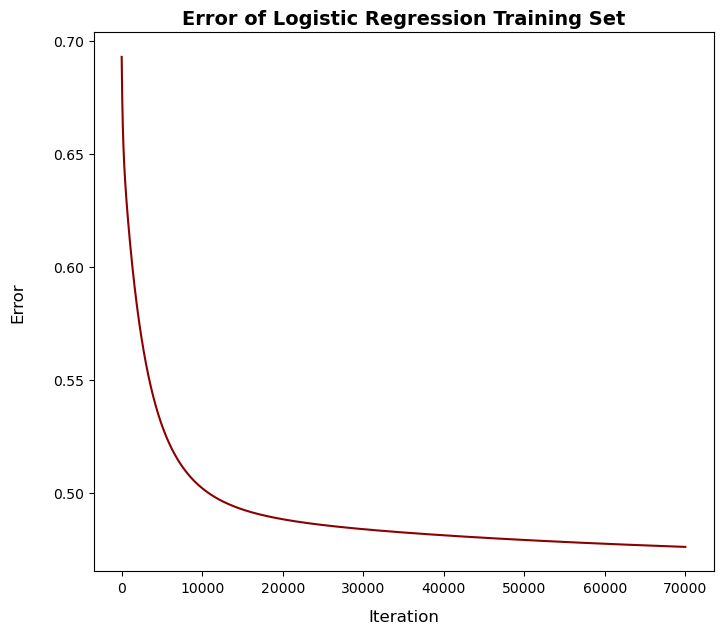

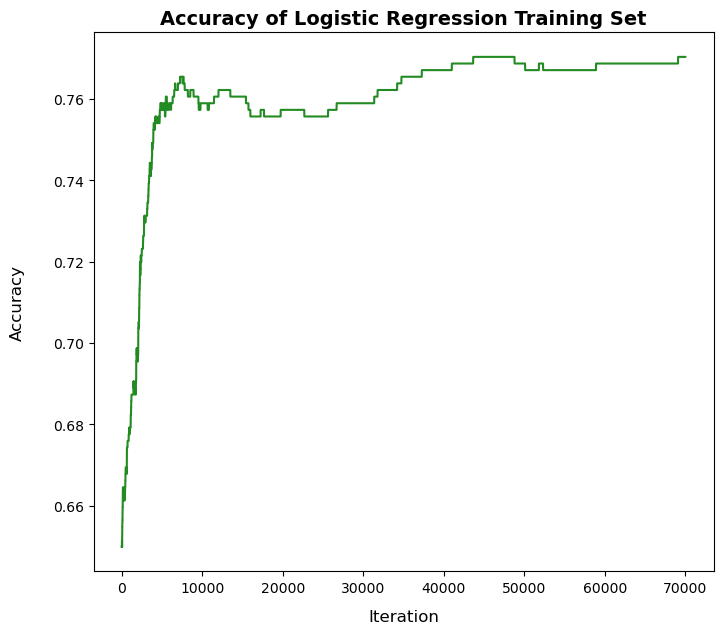

In [19]:
plt.figure(figsize = (8, 7))
plt.title("Error of Logistic Regression Training Set", fontsize= 14.0, fontweight='bold')
plt.xlabel("Iteration", labelpad = 10, fontsize= 12.0)
plt.ylabel("Error", labelpad = 20, fontsize= 12.0)
plt.plot(results_df["Iteration"], results_df["Error"], color = "darkred")
plt.show();

plt.figure(figsize = (8, 7))
plt.title("Accuracy of Logistic Regression Training Set", fontsize= 14.0, fontweight='bold')
plt.xlabel("Iteration", labelpad = 10, fontsize= 12.0)
plt.ylabel("Accuracy", labelpad = 20, fontsize= 12.0)
plt.plot(results_df["Iteration"], accuracy_lst, color = "forestgreen")
plt.show();